# The Finite Difference Time Domain method (FDTD) in two dimensions with Perfectly Matched Layers (PML)
Joshua Michael Tetzner & Jacob Peter Thönes

Based on: _Davidson, D. B. (2010). Computational electromagnetics for RF and microwave engineering. Cambridge University Press_

1. [Electromagnetic scattering problems](#El_sca)
2. [Including a source: the scattered/total field formulation](#In_source)
3. [Perfectly matched Layer](#PML)
4. [Historical Background: The Berenger´s split field formulation](#Berenger)
5. [The FDTD update equations for a PML](#UpdateEq)
6. [Simulation](#Sim)

<a id='El_sca'></a>
## 1. Electromagnetic scattering problems

When an electromagnetic field encounters a target, currents are excited on it, which in turn re-radiate. This process is called “electromagnetic scattering”. Since the Maxwell equations are linear the fields are often decomposed into an _incident_ field $E^{inc}$ and a _scattered_ field $E^{scat}$. The overall field, called the _total_ field $E^{tot}$, is then given as [Eqs. (3.1)]:

$$E^{tot} = E^{inc}+E^{scat}$$

If the scatterer is absent the _total_ field equals the _incident_ field:

$$E^{tot} = E^{inc}$$

In the following simulation the observed region is split in a total and a scattered field as follows:

<div style="align: left; text-align:center;">
  <img src="Fig3_2_Davidson.png" alt="Drawing" style="width: 400px;">
  <figcaption> <strong>Fig. 1</strong> The scatterer and surrounding FDTD zone, showing scattered field and total field regions </figcaption>
</div>

<a id='In_source'></a>
## 2. Including a source: the scattered/total field formulation

In this example the scattering of a plane wave should be observed. The simplest method for doing this is to exploit the concepts of incident, scattered and total fields, introduced in the section above. Since the Maxwell equations are linear the FDTD can be used to solve either the scattered or the total field. We will split the computational area into two zones using a (non-physical) line, as in Fig. 1. 
In one region, will only exist the scattered field, and in the other, the total field. 

Since three of the five field components in the two-dimensional Yee cell are located at half-step
values, the scattered/total field demarcation is located at
$x_L = (L - \frac{1}{2})\Delta$. Fields located _on_ and to the right of this line this will be chosen as
total fields. Fields to the left will be scattered fields.

<a id='PML'></a>
## 3. Perfectly matched Layer

The perfectly matched layer (PML) is the theoratical approach for the boundary when simulating an open field. The "real" open field would not have any boundary. With the FDTD only a bounded region with given boundary conditions can be observed. The perfect boundary for the simluation would absorbe all incoming waves. The PML is an effective approach to simulate such an absorbing boundary.

<a id='Berenger'></a>
## 4. Historical Background: The Berenger´s split field formulation

The Berenger´s split field formulation is the simplest and most efficient approach in two dimensions. The reason for this is that, contrary to the (uniaxial) UPML, the storage requirements of electric and magnetic flux vectors and the additional complexity due to dealing with dispersive materials can be avoided. It is important to note that this benefit accrues only in two dimensions.

Berenger recognized that an additional degree of freedom would permit a match off normal as well. He did this by splitting the transverse fields into two orthogonal components, for example $H_z = H_{zx} + H_{zy}$. Applying this to a two-dimensional TE problem described by the Maxwell-equations with lossless materials [Eqs. (3.5) - (3.7)]:

$$\frac{\partial E_x}{\partial t} = \frac{1}{\epsilon}\frac{\partial H_z}{\partial y}$$

$$\frac{\partial E_y}{\partial t} = -\frac{1}{\epsilon}\frac{\partial H_z}{\partial x}$$

$$\frac{\partial H_z}{\partial t} = \frac{1}{\mu} \biggl(\frac{\partial E_x}{\partial y} - \frac{\partial E_y}{\partial x} \biggl)$$

result in four equations:

$$\frac{\partial E_x}{\partial t} = \frac{1}{\epsilon} \frac{\partial (H_{zx} + H_{zy})}{\partial y}$$

$$\frac{\partial E_y}{\partial t} = -\frac{1}{\epsilon} \frac{\partial (H_{zx} + H_{zy})}{\partial x}$$

$$\frac{\partial H_{zx}}{\partial t} = -\frac{1}{\mu}\frac{\partial E_y}{\partial x}$$

$$\frac{\partial H_{zy}}{\partial t} = \frac{1}{\mu}\frac{\partial E_x}{\partial y}$$

<a id='UpdateEq'></a>
## 5. The FDTD update equations for a PML

With the theoretical background, associated with two components of $\sigma^*$ ($\sigma_x^*$ and $\sigma_y^*$) and two components of $\sigma$ ($\sigma_x$ and $\sigma_y$), describing the electrical ($\sigma$) and magnetic ($\sigma^*$) loss, the time domain equations are [Eqs. (3.58) - (3.61)]:

$$ \biggl( \epsilon \frac{\partial}{\partial t}+\sigma_y \biggl) E_x = \frac{\partial(H_{zx}+H_{zy})}{\partial y}$$

$$ \biggl( \epsilon \frac{\partial}{\partial t}+\sigma_x \biggl) E_y = -\frac{\partial(H_{zx}+H_{zy})}{\partial x}$$

$$ \biggl( \mu \frac{\partial}{\partial t}+\sigma_x^* \biggl) H_{zx} = -\frac{\partial E_y}{\partial x}$$

$$ \biggl( \mu \frac{\partial}{\partial t}+\sigma_y^* \biggl) H_{zy} = \frac{\partial E_x}{\partial y}$$

Following Yee's approach we evaluate the E- and H-Field as given by the Yee cell

<div style="align: left; text-align:center;">
  <img src="YeeCell.png" alt="Drawing" style="width: 600px;">
  <figcaption> <strong>Fig. 2</strong> Yee cell for the evaluation of the E- and H-Field on the grid. </figcaption>
</div>

With this approach we need for all $H_z$ components two $E_x$ and $E_y$ components on the edge of the cell. Therefor, the arrays of $E_x$ has to contain an additional element in x-direction and for $E_y$ in y-direction.


To evaluate the electric field, the _semi-implicit_ approximation is used. It is needed, because of the problem of evaluating the electric field at a half time step. The required value is computed as the average of the previous (known) value and the as-yet-to-be-computed value:

$$E_x\biggl(i+\frac{1}{2},j,n+\frac{1}{2}\biggl)= \frac{E_x(i+\frac{1}{2},j,n+1)+E_x(i+\frac{1}{2},j,n)}{2}$$

Using this approximation and $H_z = H_{zx} + H_{zy}$, we get the update equations by resolving the time domain equations as follows

$$\biggl( \epsilon \frac{\partial}{\partial t}+\sigma_y \biggl) E_x = \frac{\partial(H_{zx}+H_{zy})}{\partial y}$$

$$\frac{\epsilon(i,j)}{\Delta t} \biggl( E_{i+\frac{1}{2}, j}^{n+1} - E_{i+\frac{1}{2}, j}^{n} \biggl) + \frac{\sigma_y(i,j)}{2} \biggl( E_{i+\frac{1}{2}, j}^{n+1} + E_{i+\frac{1}{2}, j}^{n} \biggl) = 
\frac{1}{\Delta y} \biggl( H_{i+\frac{1}{2}, j}^{n} - H_{i-\frac{1}{2}, j}^{n} \biggl) $$

$$\frac{\epsilon(i,j)}{\Delta t} E_{i+\frac{1}{2}, j}^{n+1} - \frac{\epsilon(i,j)}{\Delta t} E_{i+\frac{1}{2}, j}^{n} + \frac{\sigma_y(i,j)}{2} E_{i+\frac{1}{2}, j}^{n+1} + \frac{\sigma_y(i,j)}{2} E_{i+\frac{1}{2}, j}^{n} = \frac{1}{\Delta y} \biggl( H_{i+\frac{1}{2}, j}^{n} - H_{i-\frac{1}{2}, j}^{n} \biggl) $$

$$ \biggl(1 + \frac{\sigma(i,j)\Delta t}{2 \epsilon(i,j)} \biggl) E_{i+\frac{1}{2}, j}^{n+1} = \biggl(1 - \frac{\sigma(i,j)\Delta t}{2 \epsilon(i,j)} \biggl) E_{i+\frac{1}{2}, j}^{n} + \frac{\Delta t}{\epsilon(i,j)\Delta y} \biggl( H_{i+\frac{1}{2}, j}^{n} - H_{i-\frac{1}{2}, j}^{n} \biggl) $$

$$ E_{i+\frac{1}{2}, j}^{n+1} = \frac{1 - \frac{\sigma(i,j)\Delta t}{2 \epsilon(i,j)}}{1 + \frac{\sigma(i,j)\Delta t}{2 \epsilon(i,j)}} E_{i+\frac{1}{2}, j}^{n} + \frac{\frac{\Delta t}{\epsilon(i,j)\Delta y}}{1 + \frac{\sigma(i,j)\Delta t}{2 \epsilon(i,j)}} \biggl( H_{i+\frac{1}{2}, j}^{n} - H_{i-\frac{1}{2}, j}^{n} \biggl)\,. $$

Since the E- and H-Field are represented by arrays which can not be accessed on half steps, the resulting set of update equations becomes [Eqs. (3.63) - (3.66)]:

$$E_x(i,j,n+1)=C_{a_{Ex}}(i,j)\cdot E_{x}(i,j,n)+C_{b_{Ex}}(i,j)\cdot [H_z(i,j,n) - H_z(i,j-1,n)]$$

$$E_y(i,j,n+1)=C_{a_{Ey}}(i,j)\cdot E_y(i,j,n)-C_{b_{Ey}}(i,j)\cdot [H_z(i,j,n) - H_z(i-1,j,n)]$$

$$H_{zx}(i,j,n)=D_{a_{Hzx}}(i,j)\cdot H_{zx}(i,j,n-1)-D_{b_{Hzx}}(i,j)\cdot [E_y(i+1,j,n) - E_y(i,j,n)]$$

$$H_{zy}(i,j,n)=D_{a_{Hzy}}(i,j)\cdot H_{zy}(i,j,n-1)-D_{b_{Hzy}}(i,j)\cdot [E_x(i,j+1,n) - E_x(i,j,n)]\,,$$

and the material constants as [Eqs. (3.68) - (3.75)]:

$$C_{a_{Ex}} (i,j) = \frac{1 - \frac{\sigma_y(i,j)\Delta t}{2\epsilon(i,j)}}{1+ \frac{\sigma_y(i,j)\Delta t}{2 \epsilon (i,j)}} \qquad \qquad \qquad 
C_{b_{Ex}} (i,j) = \frac{\frac{\Delta t}{\epsilon(i,j) \Delta y}}{1+ \frac{\sigma_y(i,j)\Delta t}{2 \epsilon (i,j)}}$$

$$C_{a_{Ey}} (i,j) = \frac{1 - \frac{\sigma_x(i,j)\Delta t}{2\epsilon(i,j)}}{1+ \frac{\sigma_x(i,j)\Delta t}{2 \epsilon (i,j)}} \qquad \qquad \qquad
C_{b_{Ey}} (i,j) = \frac{\frac{\Delta t}{\epsilon(i,j) \Delta x}}{1+ \frac{\sigma_x(i,j)\Delta t}{2 \epsilon (i,j)}}$$

$$D_{a_{Hzx}}(i,j) = \frac{1 - \frac{\sigma_x^*(i,j)\Delta t}{2\mu(i,j)}}{1+ \frac{\sigma_x^*(i,j)\Delta t}{2 \mu (i,j)}} \qquad \qquad \qquad
D_{b_{Hzx}} (i,j) = \frac{\frac{\Delta t}{\mu (i,j) \Delta x}}{1+ \frac{\sigma_x^*(i,j)\Delta t}{2 \mu (i,j)}}$$

$$D_{a_{Hzy}} (i,j) = \frac{1 - \frac{\sigma_y^*(i,j)\Delta t}{2\mu (i,j)}}{1+ \frac{\sigma_x^*(i,j)\Delta t}{2 \mu (i,j)}} \qquad \qquad \qquad
D_{b_{Hzy}} (i,j) = \frac{\frac{\Delta t}{\mu(i,j) \Delta y}}{1+ \frac{\sigma_y^*(i,j)\Delta t}{2 \mu (i,j)}}\,.$$

<a id='Sim'></a>
## 6. Simulation

### 6.1 Incident Wave

The line source and the plane wave given as a normalized Gaussian derivative pulse [Eqs. (3.41)]:

$$v_0(t) = - \frac{e^{1/2}}{\sigma}(t-m)e^{-(t-m)^2/2\sigma^2}$$

The normalizing constant $e^{1/2}/\sigma$ provides a unit peak amplitude at $t - m = ± \sigma$.

### 6.2 Code

In [1]:
using GeometryBasics
using CairoMakie
using Plots
using LinearAlgebra

In [2]:
struct PhysicalConstants{F}
    c₀::F
    ϵ₀::F
    μ₀::F
    η₀::F
end

function PhysicalConstants(F)
    return PhysicalConstants(F(2.997925e8), F(8.854187817e-12), F(4 * π * 1e-7), F(sqrt(4 * π * 1e-7/8.854187817e-12)))
end

PhysicalConstants

In [3]:
mutable struct Cartesian{F} 
    x::F
    y::F
end

mutable struct Material{F} 
    ax::Matrix{F}
    bx::Matrix{F}
    ay::Matrix{F}
    by::Matrix{F}
end

abstract type Shape{F} end

mutable struct PECCylinder{F} <: Shape{F}
    position::Cartesian{F}     # position of the center
    radius::F       # radius of cylinder
end

mutable struct PECCube{F} <: Shape{F}
    position::Cartesian{F}     # position of the bottom left corner
    sidelength::F   # sidelength (quadratic)
end

mutable struct SimRegion{I, F}
    N::Cartesian{I}
    L::I
    C::Material{F}
    D::Material{F}
    PECObjects::Vector{Shape{I}}
    Δt::F
    Δs::F
end

struct PML{I}
    depth_x::I
    depth_y::I
end

abstract type Field{F} end

mutable struct HField{F} <: Field{F}
    zx_min1::Matrix{F}
    zy_min1::Matrix{F}
    zx::Matrix{F}
    zy::Matrix{F}
    z::Matrix{F}
    z_inc::Vector{F}
end

function hfield(sr::SimRegion{I, F}) where {I, F <: Real}
    return HField(
        zeros(F, sr.N.x, sr.N.y),
        zeros(F, sr.N.x, sr.N.y),
        zeros(F, sr.N.x, sr.N.y),
        zeros(F, sr.N.x, sr.N.y),
        zeros(F, sr.N.x, sr.N.y),
        zeros(F, sr.N.y) 
    )
end

mutable struct EField{F} <: Field{F}
    x_min1::Matrix{F}
    y_min1::Matrix{F}
    x::Matrix{F}
    y::Matrix{F}
    y_inc::Vector{F}
end

function efield(sr::SimRegion{I, F}) where {I, F <: Real}
    return EField(
        zeros(F, sr.N.x, sr.N.y+1),
        zeros(F, sr.N.x+1, sr.N.y),
        zeros(F, sr.N.x, sr.N.y+1),
        zeros(F, sr.N.x+1, sr.N.y),
        zeros(F, sr.N.y) 
    )
end

abstract type Excitation{F} end

struct PointSource{F} <: Excitation{F}
    m_offset::F
    σ::F
end

struct PlaneWave{F} <: Excitation{F}
    m_offset::F
    σ::F
    peak::F
end

In [4]:
"""
    simregion(a, b, xref; L=Int(round(ref/2))

    Setup of the simulation region where `a` and `b` is the size of the simulation and `refinement` the number of cells in x-direction.
    The variable `L`sets the boundary of the scattered and total field boundary by the cellnumber.
"""
function simregion(a::F, b::F, xref::I; L=Int(round(xref/4)), C=PhysicalConstants(F)) where {I, F <: Real}
    Δs = a / xref                   # Spatial step [m].
    yref = I(round(b / Δs))         # y-refinement.
    R = 1                           # Fraction of Courant limit (must be <= 1).
    Δt = R * Δs / (C.c₀ * sqrt(2))  # Time step size [s].
     
    return SimRegion(
        Cartesian(xref, yref),
        L,
        Material(zeros(F, xref+1, yref), zeros(F, xref+1, yref), zeros(F, xref, yref+1), zeros(F, xref, yref+1)),
        Material(zeros(F, xref, yref), zeros(F, xref, yref), zeros(F, xref, yref), zeros(F, xref, yref)),
        Shape{typeof(L)}[],
        Δt,
        Δs
    )
end

"""
    add!(sr::SimRegion, pml::PML; poly_m=3)

    Function sets up PML in simulation region.
    The variable `sr` contains all information to describe the simulation region. In `pml`is the depth
    in x- and y-direction of the PML defined. 
"""
function add!(sr::SimRegion{I, F}, pml::PML{I}; poly_m=3, C=PhysicalConstants(F)) where {I, F <: Real}
    
    σ_max = 0.8 * (poly_m + 1) / (C.η₀ * sr.Δs) # [Eqs. (3.77)]
    
    # Set up material grid (free space to start)
    σx = zeros(F, sr.N.x+1, sr.N.y)
    σy = zeros(F, sr.N.x, sr.N.y+1)
    σ_ast_x = zeros(F, sr.N.x, sr.N.y)
    σ_ast_y = zeros(F, sr.N.x, sr.N.y)
    
    # For y-absorption.
    for j = 1:pml.depth_y
        dist = pml.depth_y - (j - 1)
        σy[:, j] .= σ_max * (dist / pml.depth_y)^poly_m # [Eqs. (3.76)]
        σy[:, sr.N.y-j+1] = σy[:,j]
   
        dist -= 0.5       # Hz field components located delta/2 away.
        σ_ast_y[:, j] .= C.η₀^2 * σ_max * (dist / pml.depth_y)^poly_m
        σ_ast_y[:, sr.N.y-j] = σ_ast_y[:, j]
    end

    # For x-absorption. 
    # Corner regions are automatically overlapped.
    for i = 1:pml.depth_x
        dist = pml.depth_x - (i - 1)
        σx[i, :] .= σ_max * (dist / pml.depth_x)^poly_m
        σx[sr.N.x-i+1, :] = σx[i, :]

        dist -= 0.5       # Hz field components located delta/2 away.
        σ_ast_x[i, :] .= C.η₀^2 * σ_max * (dist / pml.depth_x)^poly_m
        σ_ast_x[sr.N.x-i, :] = σ_ast_x[i, :]
    end
    
    #[Eqs. (3.68) - (3.75)]
    sr.C.ax = (1 .- σy * sr.Δt / (2 * C.ϵ₀)) ./ (1 .+ σy * sr.Δt / (2 * C.ϵ₀)) 
    sr.C.bx = sr.Δt / (C.ϵ₀ * sr.Δs) ./ (1 .+ σy * sr.Δt / (2 * C.ϵ₀))
    sr.C.ay = (1 .- σx * sr.Δt / (2 * C.ϵ₀)) ./ (1 .+ σx * sr.Δt / (2 * C.ϵ₀)) 
    sr.C.by = sr.Δt / (C.ϵ₀ * sr.Δs) ./ (1 .+ σx * sr.Δt / (2 * C.ϵ₀))
    sr.D.ax = (1 .- σ_ast_x * sr.Δt / (2 * C.μ₀)) ./ (1 .+ σ_ast_x * sr.Δt / (2 * C.μ₀)) 
    sr.D.bx = sr.Δt / (C.μ₀ * sr.Δs) ./ (1 .+ σ_ast_x * sr.Δt / (2 * C.μ₀))
    sr.D.ay = (1 .- σ_ast_y * sr.Δt / (2 * C.μ₀)) ./ (1 .+ σ_ast_y * sr.Δt / (2 * C.μ₀)) 
    sr.D.by = sr.Δt / (C.μ₀ * sr.Δs) ./ (1 .+ σ_ast_y * sr.Δt / (2 * C.μ₀))
end

"""
    add!(sr::SimRegion, pml::PECCylinder)

    Function places a PEC object in the simulation region.
    The variable `sr` contains all information to describe the simulation region. In `PECCylinder`is the cylindric PEC geometry defined. 
"""
function add!(sr::SimRegion{I, F}, cyl::PECCylinder{F}) where {I, F <: Real}
    
    for x = 1:sr.N.x
        for y = 1:sr.N.y
            if sqrt((x * sr.Δs - cyl.position.x )^2 + (y * sr.Δs - cyl.position.y )^2) <= cyl.radius 
                sr.C.bx[x, y] = 0
                sr.C.by[x, y] = 0
            end
        end
    end
    
    push!(sr.PECObjects, PECCylinder(
            Cartesian(I(round(cyl.position.x / sr.Δs)), I(round(cyl.position.y / sr.Δs))),
            I(round(cyl.radius / sr.Δs)))
    )
    
end

"""
    add!(sr::SimRegion, pml::PECCube)

    Function places a PEC object in the simulation region.
    The variable `sr` contains all information to describe the simulation region. In `PECCube`is the quadratic PEC geometry defined. 
"""
function add!(sr::SimRegion{I, F}, cb::PECCube{F}) where {I, F <: Real}
    
    for x = Int(cb.position.x / sr.Δs) - Int(cb.sidelength / (sr.Δs * 2)):Int(cb.position.x / sr.Δs) + Int(cb.sidelength / (sr.Δs * 2))
        for y = Int(cb.position.y / sr.Δs) - Int(cb.sidelength / (sr.Δs * 2)):Int(cb.position.y / sr.Δs) + Int(cb.sidelength/(sr.Δs * 2)) 
            sr.C.by[x, y] = 0
            sr.C.bx[x, y] = 0
        end
    end  
    
    push!(sr.PECObjects, PECCube(
            Cartesian(I(round(cb.position.x / sr.Δs)), I(round(cb.position.y / sr.Δs))),
            I(round(cb.sidelength / sr.Δs)))
    )
    
end

"""
    show(sr::SimRegion; pml=PML(0,0), thpos=Cartesian(Int(sr.N.x/2), Int(sr.N.y/2)))

    Function to visualize the simulation region.
    The variable `sr`containes all information to describe the simulation region, including the PEC objects placed in it.
    In `pml` is the depth of the PML layer in x- and y-directions defined and in `thpos` the position of the observation point of the time history. 
"""
function show(
        sr::SimRegion{I, F};
        pml=PML(0,0),
        thpos=Cartesian(Int(round(sr.N.x / 1.5)), Int(round(sr.N.y/1.5)))
) where {I, F <: Real}

    sim_region = Figure()
    Axis(sim_region[1, 1], aspect = DataAspect(), title="Simulation region")
    pml_plot = poly!(Rect(0, 0, sr.N.x, sr.N.y), color = :blue)
    up_L = poly!(Rect(sr.L, pml.depth_y, sr.N.x-sr.L-pml.depth_x, sr.N.y-2*pml.depth_y), color = :grey)
    un_L = poly!(Rect(pml.depth_x, pml.depth_y, sr.L, sr.N.y-2*pml.depth_y), color = :black)
    
    iscyl = false
    iscube = false
    allobjs = default
    
    for obj in sr.PECObjects
        
        if typeof(obj) == PECCylinder{Int64}
            allobjs = poly!(
                Circle(Point2f0(obj.position.x, obj.position.y), obj.radius),
                color = :orange,
                strokecolor = :black,
                strokewidth = 1
            )
            iscyl = true
        end
        
        if typeof(obj) == PECCube{Int64}
            allobjs = poly!(
                Rect(obj.position.x, obj.position.y, obj.sidelength, obj.sidelength), 
                color=:orange,
                strokecolor = :black,
                strokewidth = 1
            )
            iscube = true
        end
    end
    
    meas = poly!(Circle(Point2f0(thpos.x, thpos.y), 1), color = :red)

    #The legend depens on the activated PEC-objects
    if iscyl || iscube
        Legend(
        sim_region[1, 2],
        [up_L, un_L, allobjs, meas, pml_plot],
        ["Total field", "Scattered Field", "PEC", "Point of time history", "PML"]
        )
    else
        Legend(
        sim_region[1, 2],
        [up_L, un_L, meas, pml_plot],
        ["Total field", "Scattered Field", "Point of time history", "PML"]
        )
    end
    
    return simregion
end

"""
    gaussder_norm(t::F, offset::F, σ::F) where F <: Real

    Function returns value of Gaussian derivative pulse at time `t` with offset `offset`. 
    The variable `σ` controls the spectral content of the Gaussian derivative pulse and equals 1/omega_max.
"""
function gaussder_norm(t::F, offset::F, σ::F) where F <: Real
    # Normalized gaussian derivative pulse [Eqs. (3.41)].
    y = -exp(0.5) * (t - offset) / σ * exp(-(t - offset)^2 / (2 * σ^2))
    return y
    
end

"""
    excitation!(sr::SimRegion, H::HField{F}, E::EField{F}, ext::PlaneWave{I, F}, m) where {I, F <: Real}

    Function produces the excitation of the H-Field `H` and the E-Field `E` in the simulation region `sr` 
    of the plane wave `ext` at the timestep `m`.
"""
function excitation!(
    sr::SimRegion{I, F},
    H::HField{F},
    E::EField{F},
    ext::PlaneWave{F},
    m::I;
    C=PhysicalConstants(F)
) where {I, F <: Real}

    # Incident plane wave.
    # Only updating the H.zx component.  
    Ey_inc = ext.peak * gaussder_norm(
        (m - 1) * sr.Δt - (sr.L - 1) * sr.Δs / C.c₀,
        ext.m_offset,
        ext.σ
    )
    for ny = 1:sr.N.y
        H.zx[sr.L, ny] += sr.D.bx[sr.L, ny] * Ey_inc # [Eqs. (3.22)]
    end
    H.z = H.zx + H.zy # [Eqs. (3.67)]
    
end

"""
    excitation!(sr::SimRegion, H::HField{F}, E::EField{F}, ext::PointSource{F}, m::I) where {I, F <: Real}

    Function produces the excitation of the H-Field `H` and the E-Field `E` in the simulation region `sr` 
    of the point source `ext` at the timestep `m`.
"""
function excitation!(
    sr::SimRegion{I, F},
    H::HField{F},
    E::EField{F},
    ext::PointSource{F},
    m::I;
    C=PhysicalConstants(F)
) where {I, F <: Real}

    # Hard line source as test-function for PML and scattering.
    # It acts as PEC for scattered waves.
    H.z = H.zx + H.zy # [Eqs. (3.67)]
    H.z[sr.L, I(round(sr.N.y/2))] = 1/50 * gaussder_norm((m-1) * sr.Δt, ext.m_offset, ext.σ)
end

"""
    update!(sr::SimRegion, H::HField{F}, E::EField{F}, ext::PlaneWave{I, F}, m) where {I, F <: Real}

   Special update of the H-Field `H` and the E-Field `E` in the simulation region `sr` for the plane wave `ext` at the timestep `m`.
"""
function update!(
    sr::SimRegion{I, F},
    H::HField{F},
    E::EField{F},
    ext::PlaneWave{F},
    m::I;
    C=PhysicalConstants(F)
) where {I, F <: Real}
    
    Hz_inc = (ext.peak / C.η₀) * gaussder_norm(
        (m - 1/2) * sr.Δt - (sr.L - 1/2) * sr.Δs / C.c₀,
        ext.m_offset,
        ext.σ
    )

    for ny = 1:sr.N.y
        E.y[sr.L, ny] += sr.C.by[sr.L,ny] * Hz_inc # [Eqs. (3.23)]
    end
    
end

"""
    function fdtd_pml(
        sr::SimRegion,
        source::Excitation;
        M=350,                  # Number of time steps
        thpos=Cartesian(Int(round(sr.N.x / 1.5)), Int(round(sr.N.y/1.5))),
    )

    Functions produces a Finite Difference Time Difference simulation on the domain `sr` with the a source `source`.
    The variable `M`is the number of timesteps and defines the duration of the simulation.
    The simulation returns the z-component of the H-Field and the y-component of the E-Field at the point `thpos` as well as the time history of the hole H-Field `movieH`. 
"""
function fdtd_pml(
    sr::SimRegion{I, F},
    source::Excitation{F};
    M=350,                  # Number of time steps
    thpos=Cartesian(Int(round(sr.N.x / 1.5)), Int(round(sr.N.y/1.5))),
    C=PhysicalConstants(F)
) where {I, F <: Real}
    # allocation
    H = hfield(sr)
    E = efield(sr)

    #time history at evaluation point
    H_z_t = zeros(1, M)
    E_y_t = zeros(1, M)
    movieH = []

    # Time loop
    for m = 2:M   
        # Update H fields: 
        #[Eqs. (3.63)]
        for nx = 1:sr.N.x
            for ny = 1:sr.N.y
                H.zx[nx, ny] = sr.D.ax[nx, ny] * H.zx_min1[nx, ny] - sr.D.bx[nx, ny] * (E.y_min1[nx+1, ny] - E.y_min1[nx, ny])
                #[Eqs. (3.64)]
                H.zy[nx, ny] = sr.D.ay[nx, ny] * H.zy_min1[nx, ny] + sr.D.by[nx, ny] * (E.x_min1[nx, ny+1] - E.x_min1[nx, ny])
            end 
        end
        
        # Excitation by incident wave
        excitation!(sr, H, E, source, m)

        # Update E fields: note that latest H fields must be used.
        # [Eqs. (3.65)]
        for nx = 1:sr.N.x
            for ny = 2:sr.N.y
                E.x[nx, ny] = sr.C.ax[nx, ny] * E.x_min1[nx, ny] + sr.C.bx[nx, ny] * (H.z[nx, ny] - H.z[nx, ny-1])
            end
        end
        
        # [Eqs. (3.66)]
        for nx = 2:sr.N.x
            for ny = 1:sr.N.y
                E.y[nx, ny] = sr.C.ay[nx, ny] * E.y_min1[nx, ny] - sr.C.by[nx, ny] * (H.z[nx, ny] - H.z[nx-1, ny])
            end 
        end
        
        if !(typeof(source)==PointSource{F})
            # Special update on scat/tot field boundary for plane wave (only needed for Ey)
            update!(sr, H, E, source, m)
        end

        # Fix outer values of E_tangential as PEC.
        E.y[1,:] .= 0
        E.y[end,:] .= 0
        E.x[:,1] .= 0
        E.x[:,end] .= 0

        # Movie
        push!(movieH, (C.η₀ .* H.z))
        #Time history
        H_z_t[m] = H.z[thpos.x, thpos.y]
        E_y_t[m] = E.y[thpos.x, thpos.y]

        # Update for next iteration
        H.zx_min1 = H.zx
        H.zy_min1 = H.zy
        E.x_min1 = E.x
        E.y_min1 = E.y
    end
    
    return H_z_t, E_y_t, movieH
end

fdtd_pml

### 6.3 Example


#### Simulation Region

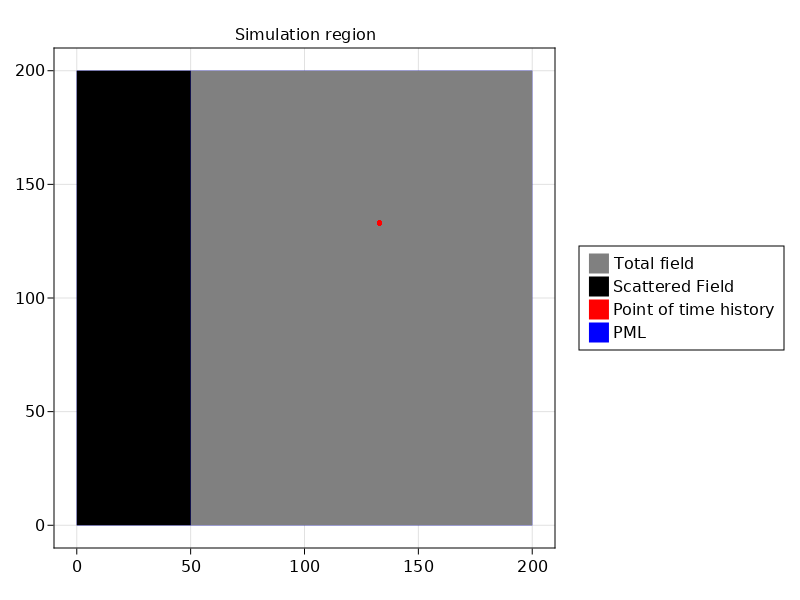

In [5]:
sizex = 1.0
sizey = 1.0
cellsx = 200
sr = simregion(sizex, sizey, cellsx)
show(sr)
current_figure()

#### PML

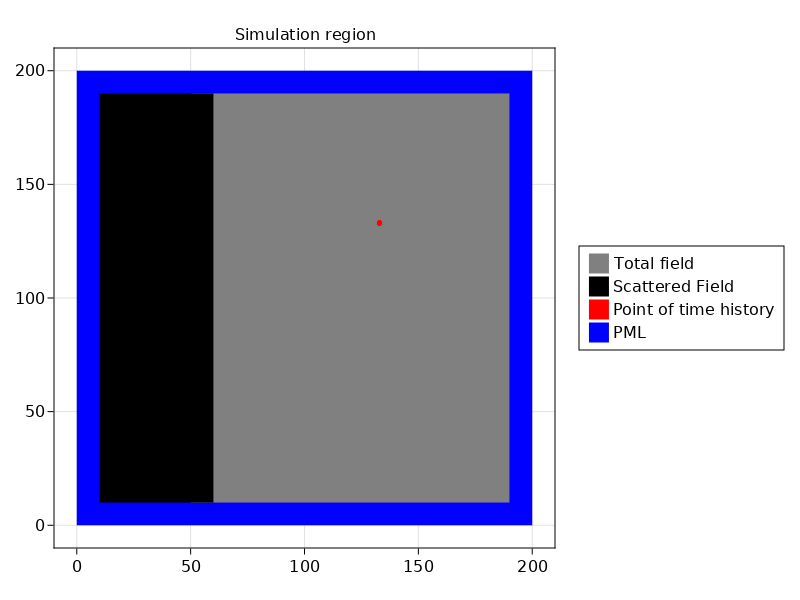

In [6]:
depthx, depthy = 10, 10
pml = PML(depthx, depthy)
add!(sr, pml)
show(sr, pml=pml)
current_figure()

#### PEC-Objects

In [7]:
#add!(sr, PECCylinder(Cartesian(0.5, 0.7), 0.1))
#add!(sr, PECCube(Cartesian(0.5, 0.3), 0.1))
#show(sr, pml=pml)
#current_figure()

#### Simulation

In [8]:
σ = 5.0e-11       # Controls spectral content of Gaussian derivative pulse equals 1/omega_max.
m_offset = 4*σ    # Controls switch-on time.
peak = 1.0
pw = PlaneWave(m_offset, σ, peak)
#pw = PointSource(m_offset, σ)
@time H_z_t, E_y_t, movieH = fdtd_pml(sr, pw, M=350);

  1.325750 seconds (968.88 k allocations: 270.596 MiB, 9.19% gc time, 39.05% compilation time)


#### Visualisation of the E-Field for each Timestep

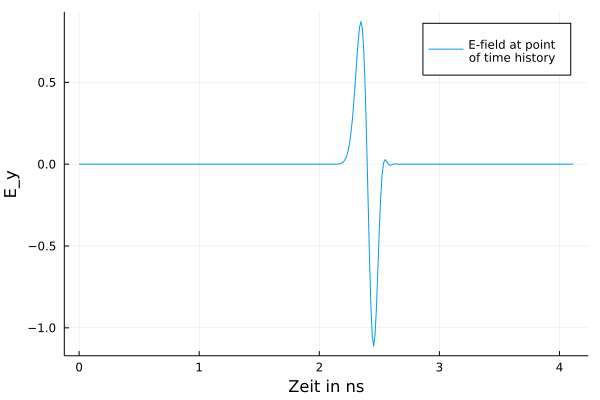

In [9]:
# Plot of time history of selcted location.
time=(range(0, length(E_y_t)-1, step=1) |> collect) * sr.Δt
plt = Plots.plot(
    time / 1e-9, transpose(E_y_t),
    label="E-field at point \nof time history",
    xlabel="Zeit in ns",
    ylabel="E_y"
)

#### Visualisation of the propagation of the simulated TE-Wave

┌ Info: Saved animation to 
│   fn = C:\Users\Joshua\Documents\Uni\Master\CEM\FDTD_PML\FDTD_PML\res.gif
└ @ Plots C:\Users\Joshua\.julia\packages\Plots\nzdhU\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Joshua\\Documents\\Uni\\Master\\CEM\\FDTD_PML\\FDTD_PML\\res.gif")
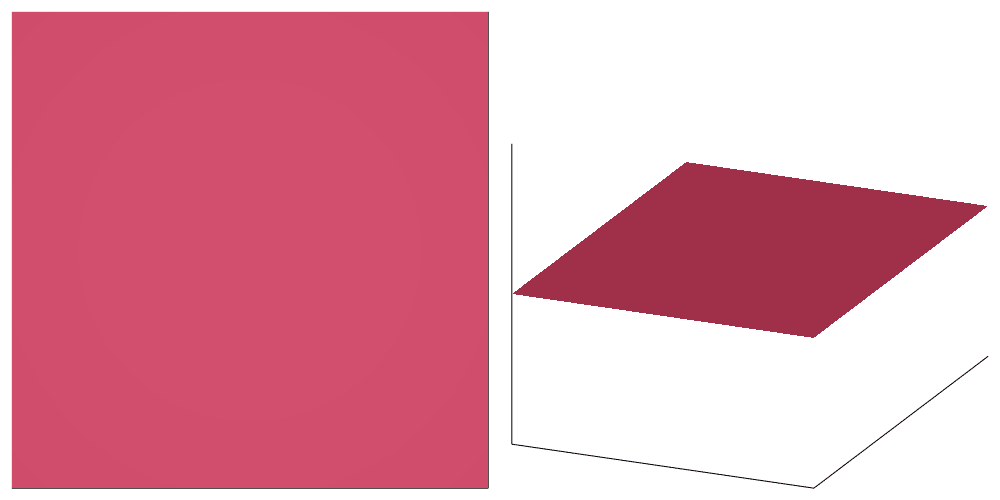

In [10]:
plotsizeX = 400*1      # Plot sizeX depends on size of simulation region.
plotsizeY = 400*1     # Plot sizeX depends on size of simulation region.

gr(fmt = :png)
anim = @animate for i in 1:5:length(movieH)
    A = Plots.plot(
        [1:sr.N.y], 
        [1:sr.N.x],
        movieH[i],
        st=:surface,
        camera=(0, 90),   # Here it is possible to change the camera angle   
        zlim=(-1, 1),      
        colorbar=false, 
        size=(plotsizeY, plotsizeX),
        axis=nothing
    )
    B = Plots.plot(
        [1:sr.N.y],
        [1:sr.N.x],
        movieH[i],
        st=:surface,
        camera=(30, 45),   # Here it is possible to change the camera angle   
        zlim=(-1.5, 1.5),      
        colorbar=false, 
        size=(plotsizeY, plotsizeX),
        axis=nothing
    )
    layout = @layout [
        a{1h}  b{1h}
    ]
    Plots.plot(A, B,; size=(1000, 500))
end
gif(anim,fps=10, "res.gif")